## Data exploration


In [5]:
import mysql.connector
import pandas as pd
from mysql.connector import errorcode
import config
import helplib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [253]:
cnx = mysql.connector.connect(host=config.host,
                              user=config.user,
                              password=config.password,
                              database='TVSHOWS')
cursor = cnx.cursor()

## Action and Drama segmented by age groups

In [292]:
q1 = """
SELECT
genre,
male_All_Ages,
female_All_Ages,
male_less_than_18,
female_less_than_18,
male_18_29,
female_18_29,
male_30_44,
female_30_44, 
male_older_than_45,
female_older_than_45
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
where genre = "Action"
;
"""

In [293]:
df1 = helplib.make_df(cursor, q1)

In [294]:
df1

,genre,male_All_Ages,female_All_Ages,male_less_than_18,female_less_than_18,male_18_29,female_18_29,male_30_44,female_30_44,male_older_than_45,female_older_than_45
0,Action,9.3,9.0,9.2,8.6,9.4,9.1,9.2,8.9,8.8,8.1
1,Action,9.1,9.2,9.2,9.7,9.2,9.3,8.9,9.0,7.8,7.6
2,Action,6.3,6.7,9.3,NaN,6.7,6.9,6.2,6.5,6.2,6.8
3,Action,9.0,9.1,8.6,7.4,9.0,9.1,9.0,9.1,8.9,9.2
4,Action,8.8,8.9,8.8,8.9,9.0,9.0,8.7,8.9,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
134,Action,5.8,6.0,5.4,6.2,5.9,6.2,5.7,5.8,5.7,6.0
135,Action,7.5,7.9,5.7,8.7,7.7,8.1,7.5,7.8,7.1,7.3
136,Action,6.9,6.5,6.8,7.8,7.1,6.7,6.7,6.5,6.0,5.5
137,Action,7.8,8.2,7.0,NaN,7.5,7.7,7.9,8.3,7.9,8.4


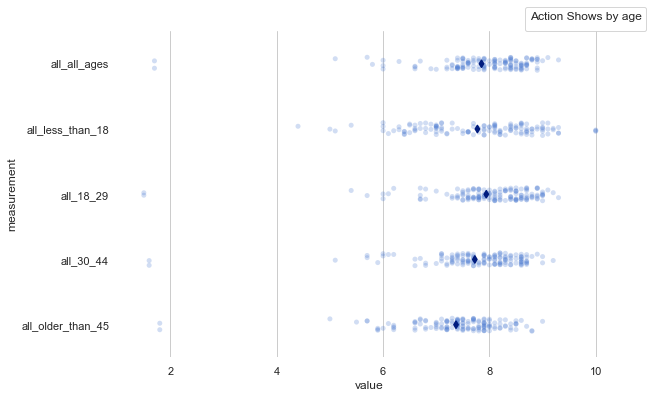

In [154]:
# "Melt" the dataset to "long-form" or "tidy" representation
action = pd.melt(df1, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="genre",
              data=action, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=action, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Action Shows by age",
          handletextpad=0, columnspacing=1,bbox_to_anchor=(1.05, 1),
          loc="lower right", ncol=3, borderaxespad=0.,frameon=True)


In [218]:
qdrama = """
SELECT
genre,
all_all_ages, 
all_less_than_18,
all_18_29,
all_30_44,
all_older_than_45 
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Drama";
"""

In [219]:
dfdrama = helplib.make_df(cursor, qdrama)

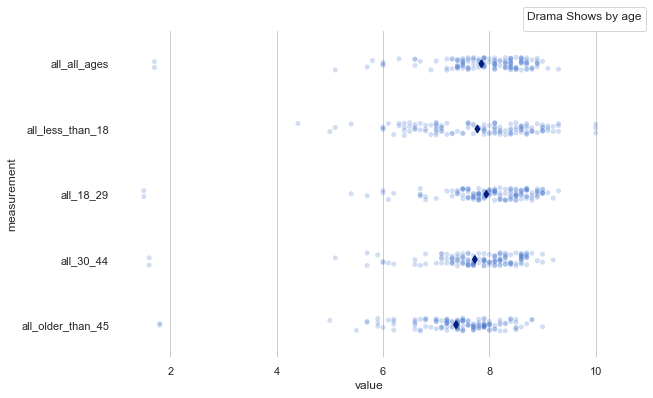

In [220]:
# "Melt" the dataset to "long-form" or "tidy" representation
action = pd.melt(df1, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="genre",
              data=action, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=action, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Drama Shows by age",
          handletextpad=0, columnspacing=1,bbox_to_anchor=(1.05, 1),
          loc="lower right", ncol=3, borderaxespad=0.,frameon=True)

In [116]:
q1action = """
select
genre, 
female_All_Ages,
male_All_Ages,
female_less_than_18,
male_less_than_18,
female_18_29,
male_18_29,
female_30_44,
male_30_44,
female_older_than_45, 
male_older_than_45
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Action"; 
;
"""

In [117]:
dfaction = helplib.make_df(cursor, q1action)

In [118]:
dfaction

,genre,female_All_Ages,male_All_Ages,female_less_than_18,male_less_than_18,female_18_29,male_18_29,female_30_44,male_30_44,female_older_than_45,male_older_than_45
0,Action,9.0,9.3,8.6,9.2,9.1,9.4,8.9,9.2,8.1,8.8
1,Action,9.2,9.1,9.7,9.2,9.3,9.2,9.0,8.9,7.6,7.8
2,Action,6.7,6.3,NaN,9.3,6.9,6.7,6.5,6.2,6.8,6.2
3,Action,9.1,9.0,7.4,8.6,9.1,9.0,9.1,9.0,9.2,8.9
4,Action,8.9,8.8,8.9,8.8,9.0,9.0,8.9,8.7,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
134,Action,6.0,5.8,6.2,5.4,6.2,5.9,5.8,5.7,6.0,5.7
135,Action,7.9,7.5,8.7,5.7,8.1,7.7,7.8,7.5,7.3,7.1
136,Action,6.5,6.9,7.8,6.8,6.7,7.1,6.5,6.7,5.5,6.0
137,Action,8.2,7.8,NaN,7.0,7.7,7.5,8.3,7.9,8.4,7.9


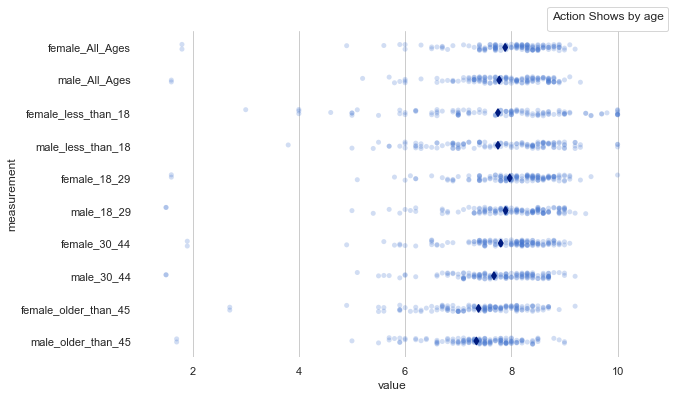

In [153]:
# "Melt" the dataset to "long-form" or "tidy" representation
df = pd.melt(dfaction, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="genre",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Action Shows by age",
          handletextpad=0, columnspacing=1,bbox_to_anchor=(1.05, 1),
          loc="lower right", ncol=3, borderaxespad=0.,frameon=True)

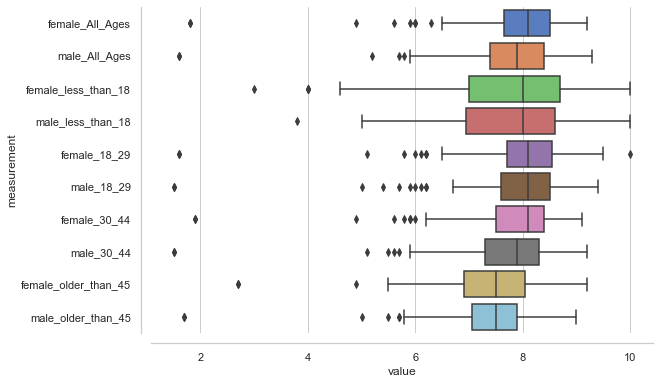

In [140]:
# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))


# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="measurement", x="value",data=df)
#             hue="smoker", palette=["m", "g"],
#             data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
sns.despine(offset=10)

In [173]:
q1drama = """
select
genre, 
female_All_Ages,
male_All_Ages,
female_less_than_18,
male_less_than_18,
female_18_29,
male_18_29,
female_30_44,
male_30_44,
female_older_than_45, 
male_older_than_45
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Drama"; 
;
"""

In [174]:
dfdrama = helplib.make_df(cursor, q1drama)

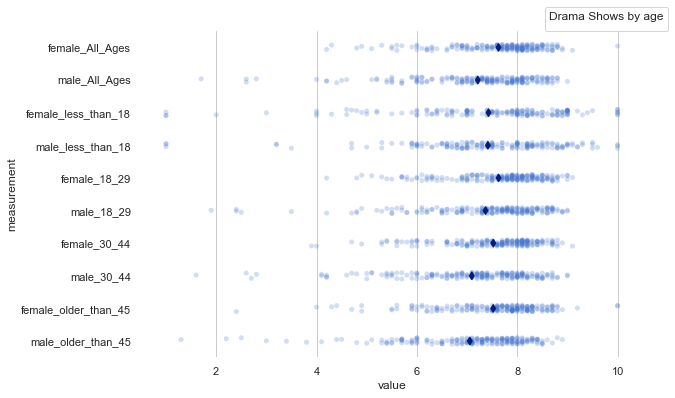

In [175]:
# "Melt" the dataset to "long-form" or "tidy" representation
dfdrama = pd.melt(dfdrama, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="genre",
              data=dfdrama, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=dfdrama, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Drama Shows by age",
          handletextpad=0, columnspacing=1,bbox_to_anchor=(1.05, 1),
          loc="lower right", ncol=3, borderaxespad=0.,frameon=True)

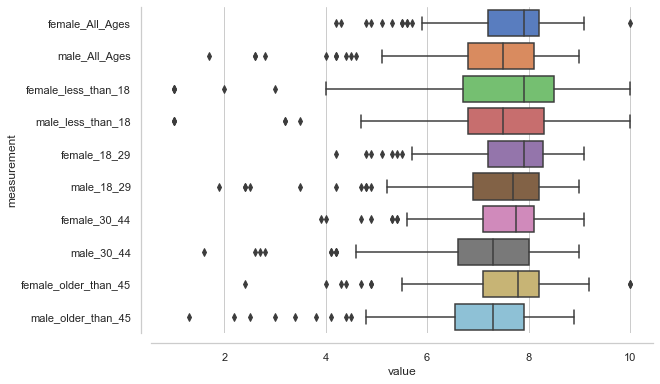

In [176]:
# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))


# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="measurement", x="value",data=dfdrama)
#             hue="smoker", palette=["m", "g"],
#             data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
sns.despine(offset=10)

## All genre by segments


In [53]:
q2 = """
SELECT
genre,
all_all_ages, 
all_less_than_18,
all_18_29,
all_30_44,
all_older_than_45 
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
;
"""

In [54]:
df2 = helplib.make_df(cursor, q2)

In [55]:
df2

,genre,all_all_ages,all_less_than_18,all_18_29,all_30_44,all_older_than_45
0,Action,9.3,9.1,9.3,9.2,8.8
1,Action,9.1,9.3,9.2,8.9,7.8
2,Action,6.3,9.3,6.7,6.2,6.2
3,Action,9.0,8.6,9.0,9.0,9.0
4,Action,8.9,8.8,9.0,8.7,8.0
...,...,...,...,...,...,...
1582,Reality,6.4,3.0,6.9,6.4,6.2
1583,Reality,7.5,NaN,7.4,7.1,7.7
1584,Reality,5.6,6.5,5.3,5.6,5.6
1585,Reality,5.0,NaN,4.2,5.8,4.3


No handles with labels found to put in legend.


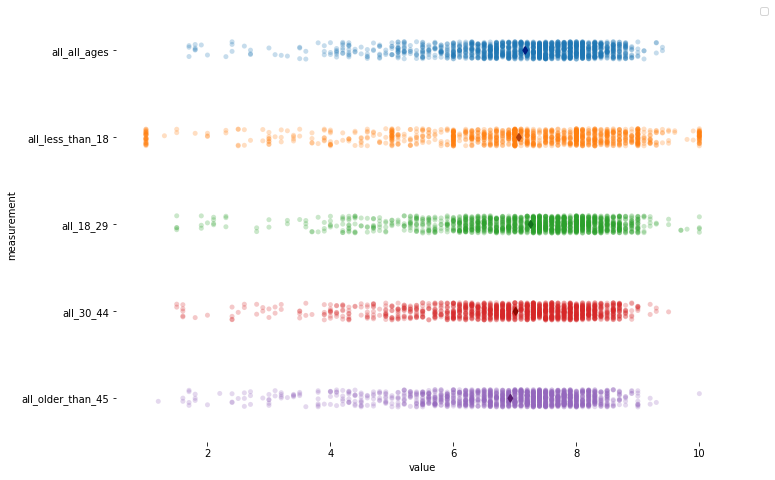

In [56]:
# "Melt" the dataset to "long-form" or "tidy" representation
df2 = pd.melt(df2, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(11,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=df2, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement",
              data=df2, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="TV Shows by age",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Genres by females by age segments

In [106]:
q3 = """
select
genre, 
female_All_Ages, 
female_less_than_18,
female_18_29,
female_30_44,
female_older_than_45 
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Action" OR genre = "Fantasy" or genre = "Drama"; 
;
"""

In [107]:
df3 = helplib.make_df(cursor, q3)

In [108]:
df3

,genre,female_All_Ages,female_less_than_18,female_18_29,female_30_44,female_older_than_45
0,Action,9.0,8.6,9.1,8.9,8.1
1,Action,9.2,9.7,9.3,9.0,7.6
2,Action,6.7,NaN,6.9,6.5,6.8
3,Action,9.1,7.4,9.1,9.1,9.2
4,Action,8.9,8.9,9.0,8.9,8.0
...,...,...,...,...,...,...
460,Fantasy,7.9,NaN,9.6,6.7,5.8
461,Fantasy,5.9,2.0,5.3,6.2,6.2
462,Fantasy,6.7,6.1,6.3,7.1,6.7
463,Fantasy,7.4,NaN,7.2,7.7,NaN


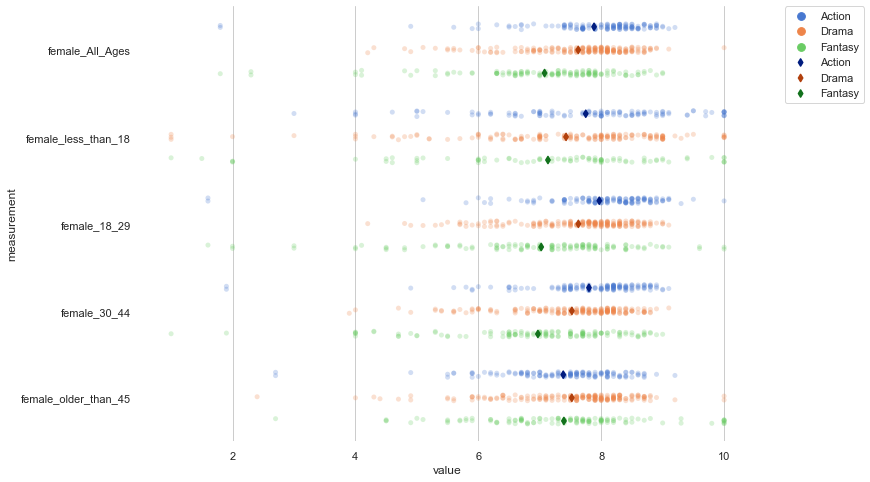

In [185]:
# "Melt" the dataset to "long-form" or "tidy" representation
df = pd.melt(df3, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(11,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",hue="genre",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement",hue="genre",
              data=df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="TV Shows by age",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

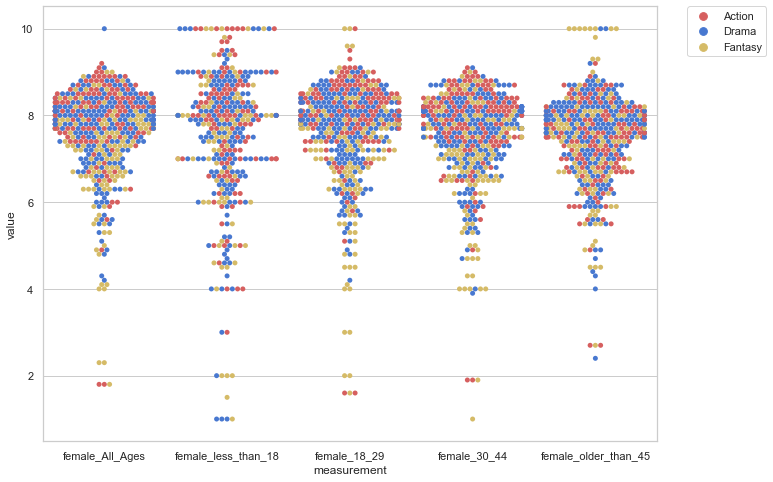

In [110]:
sns.set(style="whitegrid", palette="muted")

# Initialize the figure
f, ax = plt.subplots(figsize =(11,8))

# "Melt" the dataset to "long-form" or "tidy" representation
df = pd.melt(df3, "genre", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="genre",
              palette=['r','b','y'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Genres by male  by age segments

In [189]:
q5 = """
select
genre, 
male_All_Ages, 
male_less_than_18,
male_18_29,
male_30_44,
male_older_than_45 
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Action" OR genre = "Fantasy" OR genre = "Drama"; 
;
"""

In [190]:
df5 = helplib.make_df(cursor, q5)

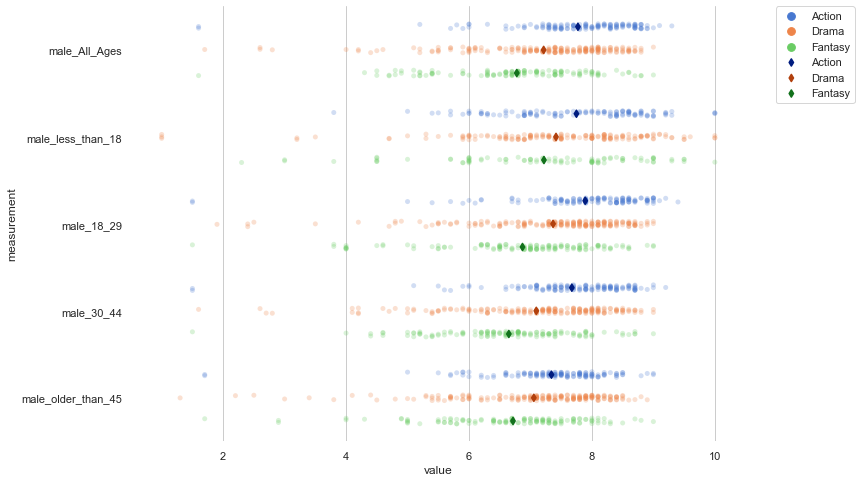

In [191]:
# "Melt" the dataset to "long-form" or "tidy" representation
df5 = pd.melt(df5, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(11,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",hue="genre",
              data=df5, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=df5, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="TV Shows by age",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

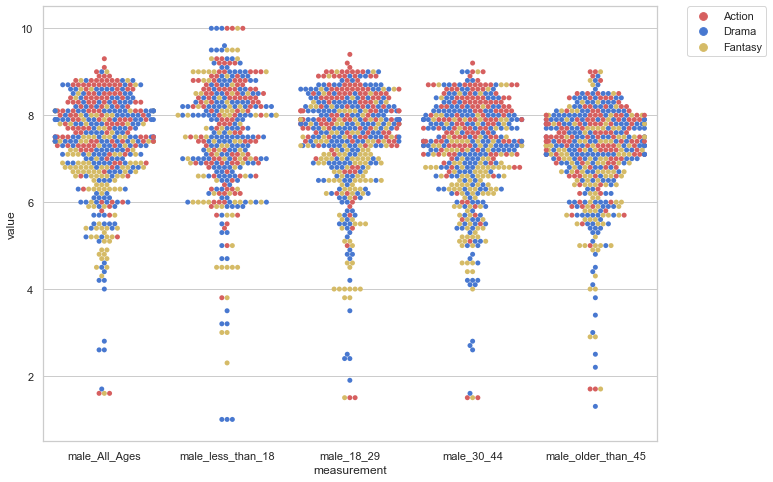

In [195]:
sns.set(style="whitegrid", palette="muted")

# Initialize the figure
f, ax = plt.subplots(figsize =(11,8))

# "Melt" the dataset to "long-form" or "tidy" representation
df5 = pd.melt(df5, "genre", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="genre",
              palette=['r','b','y'], data=df5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## comparing the 18-29 grup by genres

In [203]:
q6 = """
select
genre, 
male_18_29,
female_18_29

FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Action" OR genre = "Fantasy" OR genre = "Drama"; 
;
"""

In [206]:
df6 = helplib.make_df(cursor, q6)

In [207]:
df6

,genre,male_18_29,female_18_29
0,Action,9.4,9.1
1,Action,9.2,9.3
2,Action,6.7,6.9
3,Action,9.0,9.1
4,Action,9.0,9.0
...,...,...,...
460,Fantasy,6.6,9.6
461,Fantasy,3.8,5.3
462,Fantasy,7.1,6.3
463,Fantasy,6.9,7.2


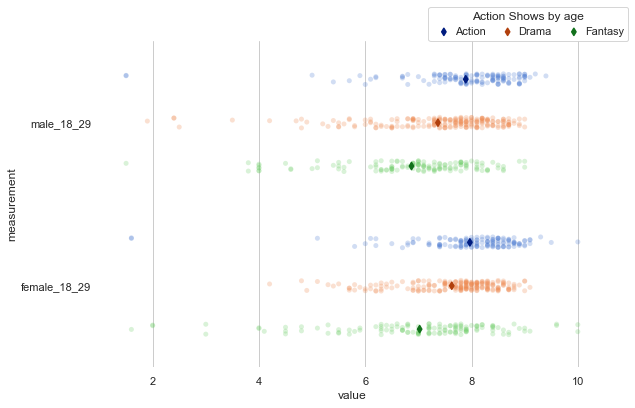

In [208]:
# "Melt" the dataset to "long-form" or "tidy" representation
df = pd.melt(df6, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="genre",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Action Shows by age",
          handletextpad=0, columnspacing=1,bbox_to_anchor=(1.05, 1),
          loc="lower right", ncol=3, borderaxespad=0.,frameon=True)

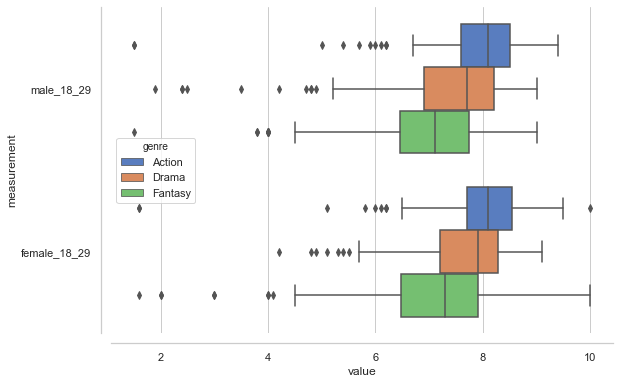

In [212]:
# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))


# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="measurement", x="value",hue= "genre", data=df)
#             hue="smoker", palette=["m", "g"],
#             data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
sns.despine(offset=10)

## comparing the 30-44 grup by genres

In [213]:
q7 = """
select
genre, 
male_30_44,
female_30_44

FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
Where genre = "Action" OR genre = "Fantasy" OR genre = "Drama"; 
;
"""

In [215]:
df7 = helplib.make_df(cursor, q7)
df7

,genre,male_30_44,female_30_44
0,Action,9.2,8.9
1,Action,8.9,9.0
2,Action,6.2,6.5
3,Action,9.0,9.1
4,Action,8.7,8.9
...,...,...,...
460,Fantasy,5.6,6.7
461,Fantasy,4.6,6.2
462,Fantasy,6.9,7.1
463,Fantasy,6.4,7.7


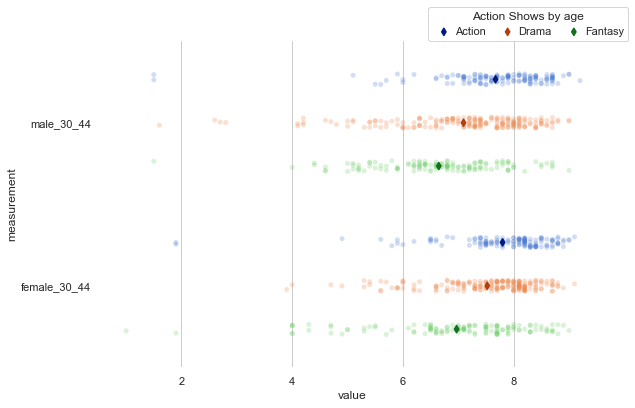

In [216]:
# "Melt" the dataset to "long-form" or "tidy" representation
df = pd.melt(df7, "genre", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="genre",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="genre",
              data=df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Action Shows by age",
          handletextpad=0, columnspacing=1,bbox_to_anchor=(1.05, 1),
          loc="lower right", ncol=3, borderaxespad=0.,frameon=True);

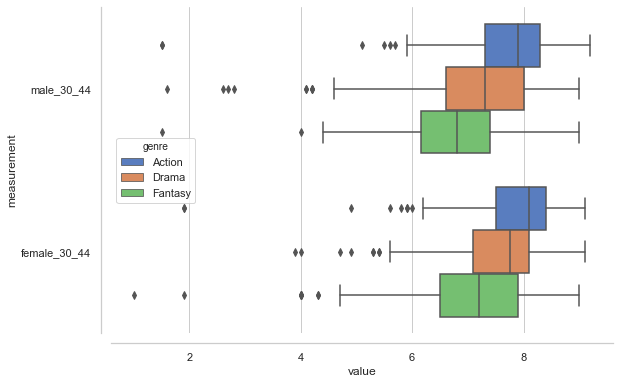

In [217]:
# Initialize the figure
f, ax = plt.subplots(figsize =(9,6))


# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="measurement", x="value",hue= "genre", data=df)
#             hue="smoker", palette=["m", "g"],
#             data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
sns.despine(offset=10)

## Heat map

In [241]:
q8 = """
SELECT
genre,
all_all_ages, 
male_All_Ages,
female_All_Ages,
all_less_than_18,
male_less_than_18,
female_less_than_18,
all_18_29,
male_18_29,
female_18_29,
all_30_44,
male_30_44,
female_30_44,
all_older_than_45, 
male_older_than_45,
female_older_than_45
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
;
"""

In [242]:
df8 = helplib.make_df(cursor, q8)

In [243]:
df8_1 = df8.groupby('genre').mean()

In [244]:
df8_1

,all_all_ages,male_All_Ages,female_All_Ages,all_less_than_18,male_less_than_18,female_less_than_18,all_18_29,male_18_29,female_18_29,all_30_44,male_30_44,female_30_44,all_older_than_45,male_older_than_45,female_older_than_45
genre,,,,,,,,,,,,,,,
Action,7.851079,7.771942,7.883453,7.774219,7.747967,7.748276,7.941727,7.890647,7.968345,7.725899,7.672662,7.800719,7.371942,7.341727,7.382014
Anime,7.317778,7.242222,7.287778,7.162821,7.262500,7.410638,7.337778,7.321111,7.220225,7.175556,7.113333,7.282222,7.088889,7.054444,7.226506
Comedy,7.390283,7.261538,7.498785,7.243290,7.331336,7.316019,7.497166,7.406073,7.537805,7.298785,7.180162,7.411336,7.102024,6.991498,7.293496
Crime,7.268947,7.092632,7.435450,7.159055,7.184685,7.283333,7.338421,7.232632,7.498404,7.095789,6.965263,7.309626,7.213757,7.103704,7.413830
Documentary,7.058152,6.762500,7.324044,6.815000,6.965152,6.542105,7.199454,6.970166,7.457647,6.873770,6.680220,7.253073,6.861749,6.607222,7.278090
Drama,7.430256,7.214872,7.626667,7.356983,7.415569,7.427879,7.530769,7.367692,7.628351,7.302564,7.094872,7.523196,7.224103,7.054872,7.521538
Fantasy,7.014504,6.777099,7.077863,7.056436,7.219565,7.133333,7.054962,6.870229,7.023437,6.778626,6.648092,6.969466,6.838931,6.716031,7.392623
Horror,6.961111,6.794444,7.211111,6.786667,7.582609,6.337037,7.088889,7.002778,7.220000,6.841667,6.702778,7.108333,6.766667,6.633333,7.163889
Kids,6.461053,6.098947,6.521053,5.830667,5.785333,6.384375,6.297895,6.172632,6.573404,6.170526,6.073684,6.474737,6.142105,6.086170,6.556522


In [247]:
df8_std = df8.groupby('genre').std()

In [248]:
df8_std

,all_all_ages,male_All_Ages,female_All_Ages,all_less_than_18,male_less_than_18,female_less_than_18,all_18_29,male_18_29,female_18_29,all_30_44,male_30_44,female_30_44,all_older_than_45,male_older_than_45,female_older_than_45
genre,,,,,,,,,,,,,,,
Action,1.053866,1.073936,1.044488,1.079680,1.131831,1.447125,1.071495,1.108785,1.082003,1.044470,1.072705,1.042537,0.989073,1.004187,0.986301
Anime,0.609951,0.644593,0.817207,1.373223,1.323295,2.303328,0.693076,0.682608,0.926648,0.681754,0.678100,0.905238,0.703833,0.711883,1.559791
Comedy,1.034559,1.104508,0.956088,1.449148,1.426188,1.825186,1.034660,1.078129,0.997217,1.052155,1.115874,1.106096,0.994434,1.067160,0.953682
Crime,0.960508,1.009504,0.913296,1.731792,1.624427,1.914414,1.047268,1.104531,1.021505,0.978274,1.031080,0.986693,0.930638,0.997623,0.922227
Documentary,1.353457,1.612538,1.322490,2.433630,2.331028,2.603909,1.428036,1.685426,1.474146,1.455671,1.622543,1.433480,1.464661,1.764961,1.490923
Drama,1.047116,1.232186,0.921287,1.405324,1.498954,1.666587,1.046189,1.244299,0.914348,1.087437,1.269538,0.934335,1.115857,1.231173,1.036572
Fantasy,0.988559,1.139201,1.282083,1.621691,1.562629,1.976326,1.118461,1.276214,1.534459,1.103701,1.124986,1.378566,1.077502,1.189946,1.286752
Horror,1.007480,1.028992,0.886978,1.879423,1.698302,2.421879,0.935270,0.975261,0.900915,1.021868,1.040188,0.997246,1.036753,1.028175,0.889351
Kids,1.444380,1.500531,1.530533,2.293350,2.238586,2.582740,1.712344,1.777905,1.834800,1.456816,1.477650,1.666438,1.383072,1.423731,1.660683


In [249]:
df8_med = df8.groupby('genre').median()

In [250]:
df8_med

,all_all_ages,male_All_Ages,female_All_Ages,all_less_than_18,male_less_than_18,female_less_than_18,all_18_29,male_18_29,female_18_29,all_30_44,male_30_44,female_30_44,all_older_than_45,male_older_than_45,female_older_than_45
genre,,,,,,,,,,,,,,,
Action,8.10,7.9,8.10,7.95,8.00,8.00,8.10,8.10,8.10,7.90,7.90,8.10,7.50,7.50,7.50
Anime,7.30,7.3,7.40,7.05,7.10,7.90,7.40,7.40,7.30,7.20,7.15,7.30,7.20,7.10,7.30
Comedy,7.60,7.5,7.70,7.50,7.50,7.60,7.70,7.60,7.70,7.50,7.40,7.70,7.20,7.20,7.50
Crime,7.40,7.1,7.60,7.00,7.00,7.55,7.50,7.35,7.60,7.20,7.10,7.50,7.40,7.30,7.60
Documentary,7.35,7.1,7.50,7.00,7.10,7.00,7.40,7.40,7.60,7.20,7.10,7.40,7.10,7.10,7.55
Drama,7.60,7.5,7.90,7.50,7.50,7.90,7.80,7.70,7.90,7.50,7.30,7.75,7.50,7.30,7.80
Fantasy,7.00,6.8,7.30,7.50,7.45,7.65,7.10,7.10,7.30,6.80,6.80,7.20,7.00,6.90,7.50
Horror,7.00,6.9,7.15,7.00,8.00,7.00,7.05,7.05,7.20,6.85,6.80,7.15,6.85,6.70,7.30
Kids,6.80,6.2,6.80,6.50,6.40,7.20,6.40,6.40,6.95,6.30,6.40,6.90,6.40,6.35,6.75


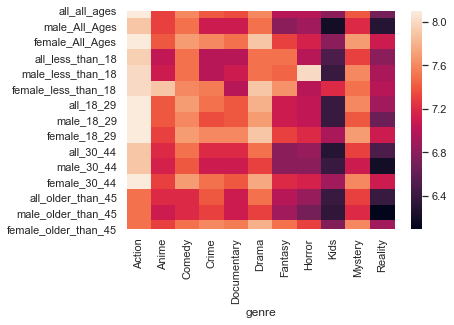

In [251]:
sns.heatmap(df8_med.T)

## reality tv

In [266]:
q9 = """
SELECT
genre,
male_All_Ages,
female_All_Ages,
male_less_than_18,
female_less_than_18,
male_18_29,
female_18_29,
male_30_44,
female_30_44, 
male_older_than_45,
female_older_than_45
FROM TVSHOWS.RATINGS 
JOIN TVSHOWS.Hulu 
USING(imdbID) 
where genre = "Reality"
;
"""

In [267]:
df9 = helplib.make_df(cursor, q9)

In [295]:
df9_avg = df9.groupby("genre").mean()
df1_avg = df1.groupby("genre").mean()

In [296]:
df_reality = df9_avg.T
df_action = df1_avg.T

In [278]:
df_new.shape

(10, 1)

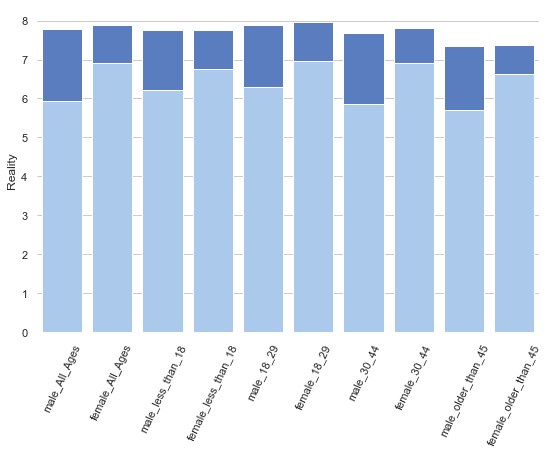

In [300]:
f, ax = plt.subplots(figsize =(9,6))

sns.despine(bottom=True, left=True)
sns.set_color_codes("muted")
sns.barplot(x=df_new.index, y="Action", data=df_action,
            label="Total", color="b")

sns.despine(bottom=True, left=True)
sns.set_color_codes("pastel")
sns.barplot(x=df_new.index, y="Reality", data=df_reality,
            label="Total", color="b")

ax.set_xticklabels(ax.get_xticklabels(), rotation =65);

